In [12]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Example: Cellvariability after Treatment
We assume that we have a dataset with the viability of cells in three groups: a control group and two treatment groups. We want to analyze the variability in cell viability after treatment.

In [13]:
# Example: Cellvariability after Treatment

sample_size = 10
np.random.seed(42)  # Set for reproducibility

real_control_mean = 80
real_treatment_a_mean = 70
real_treatment_b_mean = 40
real_control_std = 20
real_treatment_a_std = 10
real_treatment_b_std = 30

data = pd.DataFrame({
    "group": ["Control"] * sample_size + ["Treatment A"] * sample_size + ["Treatment B"] * sample_size,
    "Viability": np.concatenate([
        np.random.normal(real_control_mean, real_control_std, sample_size),  # Kontrollgruppe
        np.random.normal(real_treatment_a_mean, real_treatment_a_std, sample_size),  # Behandlung A
        np.random.normal(real_treatment_b_mean, real_treatment_b_std, sample_size)   # Behandlung B
    ])
})

In [14]:
data

,group,Viability
0,Control,89.934283
1,Control,77.234714
2,Control,92.953771
3,Control,110.460597
4,Control,75.316933
5,Control,75.317261
6,Control,111.584256
7,Control,95.348695
8,Control,70.610512
9,Control,90.851201


In [15]:
data.groupby('group').describe()

Viability                                                         \
                count       mean        std        min        25%        50%   
group                                                                          
Control          10.0  88.961222  14.460167  70.610512  75.796624  90.392742   
Treatment A      10.0  62.093418   7.553247  50.867198  56.875644  62.648442   
Treatment B      10.0  33.344693  24.416934  -2.742446  22.402759  32.237949   

                                    
                   75%         max  
group                               
Control      94.749964  111.584256  
Treatment A  65.360043   73.142473  
Treatment B  43.002220   83.969463

<Axes: xlabel='Viability', ylabel='Count'>

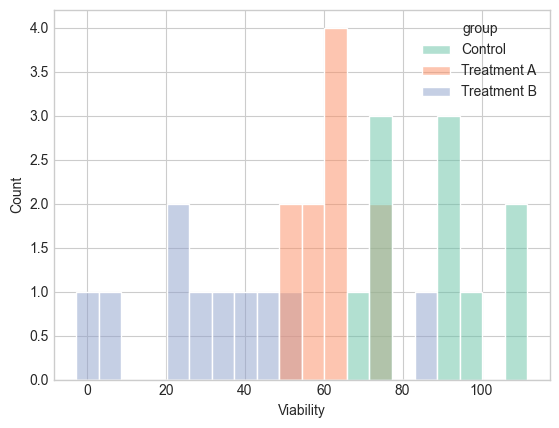

In [16]:
sns.histplot(data, x="Viability", hue="group", bins=20, palette="Set2")

# **Explanation: Random Variable, Expectation, and Mean as Approximation of Expectation**

## **Random Variable**
A **random variable** is a variable that takes on different values based on the outcome of a random event. It is typically defined as a function that maps outcomes in a sample space to numerical values.

### **Types of Random Variables:**
1. **Discrete Random Variable:** Takes on a countable number of values (e.g., the number of heads in a coin toss).
2. **Continuous Random Variable:** Takes on an uncountable range of values (e.g., the weight of a tumor sample).

Formally, a random variable \(X\) can be defined over a probability space \((\Omega, \mathcal{F}, P)\), where \(\Omega\) is the sample space, \(\mathcal{F}\) is a set of events, and \(P\) is the probability measure.

---

## **Expectation (Expected Value)**
The **expectation** or **expected value** of a random variable \(X\), denoted \(E[X]\), is the theoretical mean of the random variable based on its probability distribution. It represents the average value \(X\) would take on over an infinite number of trials.

### **Formulas:**
- For a **discrete random variable** \(X\) with possible values \(x_i\) and probabilities \(P(X = x_i) = p_i\):
  $$
  E[X] = \sum_{i} x_i \cdot p_i
  $$

- For a **continuous random variable** \(X\) with a probability density function (PDF) \(f(x)\):
  $$
  E[X] = \int_{-\infty}^{\infty} x \cdot f(x) \ dx
  $$

The expectation provides a measure of the central tendency of the random variable.

---

## **Standard Deviation**
The **standard deviation** measures the spread or variability of a random variable around its expected value. It is the square root of the variance, which quantifies the average squared deviation from the mean.

### **Formulas:**
- **Variance** of a random variable \(X\):
  $$
  \text{Var}(X) = E[(X - E[X])^2]
  $$


## **Mean as Approximation of Expectation**
In practice, the **mean** of a finite sample is used as an approximation of the theoretical expectation \(E[X]\). When we take \(n\) observations of a random variable \(X\), the mean \(\bar{X}\) is given by:
$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

### **Relationship Between Mean and Expectation:**
- The law of large numbers states that as \(n \to \infty\), the sample mean \(\bar{X}\) converges to the expected value \(E[X]\).
- Thus, the mean is a practical estimator for \(E[X]\) when working with finite samples.

### **Approximarion of the Standard Deviation:**
The standard deviation of a sample is used as an approximation of the standard deviation of the random variable. The sample standard deviation is calculated as:
$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2}
$$

### **Example:**
Suppose \(X\) represents the outcome of rolling a fair six-sided die:
- The possible values are \(\{1, 2, 3, 4, 5, 6\}\).
- The expected value is:
  $$
  E[X] = \frac{1}{6}(1 + 2 + 3 + 4 + 5 + 6) = 3.5
  $$
- For 10 rolls, the sample mean might be \(\bar{X} = 3.7\), which approximates \(E[X] = 3.5\).

- standart deviation approximation:
$$
\sigma = \sqrt{\frac{1}{9}((1-3.7)^2 + (2-3.7)^2 + \ldots + (6-3.7)^2)} = 1.87
$$
---

## **Summary:**
- A **random variable** describes possible outcomes of a random phenomenon.
- The **expectation** is the theoretical average based on the probability distribution of the random variable.
- The **mean** of a sample provides an estimate of the expectation, becoming more accurate with larger sample sizes.
- The **standard deviation** quantifies the variability of the random variable around its mean.


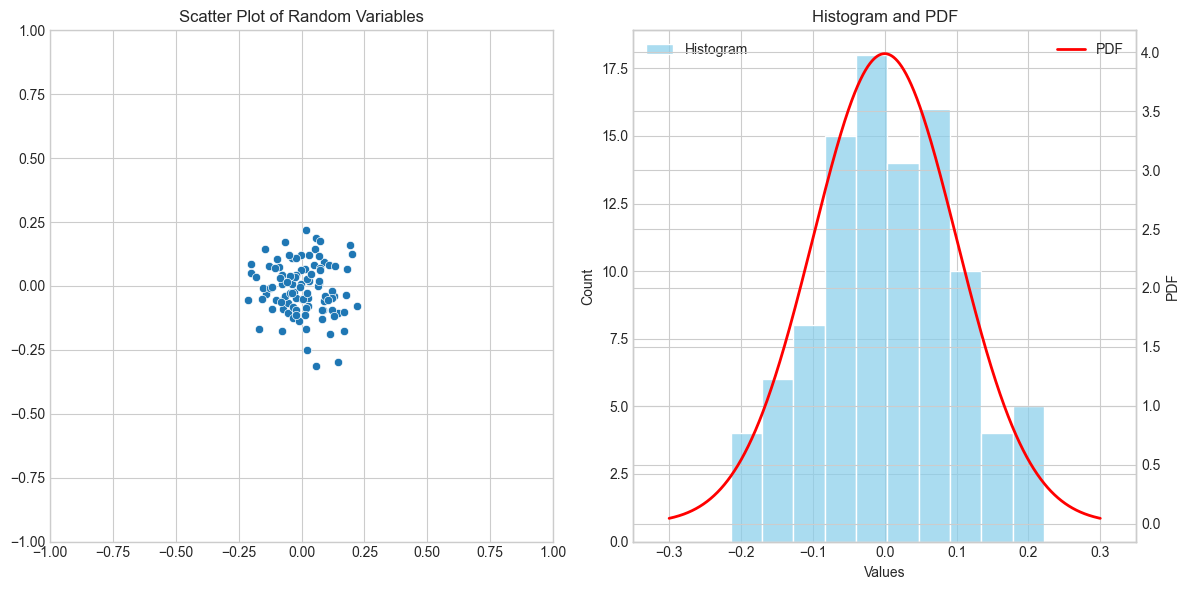

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
# Subplots erstellen
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 6)


mean = 0.0
std = 0.1
sample_size = 100
X = np.random.normal(mean, std, sample_size)
Y = np.random.normal(mean, std, sample_size)

sns.scatterplot(x=X, y=Y, ax=ax[0])
ax[0].set_xlim(-1, 1)  # x-Achse begrenzen
ax[0].set_ylim(-1, 1)  # y-Achse begrenzen
ax[0].set_title("Scatter Plot of Random Variables")

# --- Histogramm und PDF auf der rechten Achse ---
# Zweite y-Achse erstellen
ax2 = ax[1].twinx()

# PDF-Kurve zeichnen
true_x = np.linspace(-0.3, 0.3, 10000)
true_y = stats.norm.pdf(true_x, mean, std)
ax2.plot(true_x, true_y, color='red', label="PDF", linewidth=2)
ax2.set_ylabel("PDF")

# Histogramm zeichnen
sns.histplot(X, ax=ax[1], bins=math.ceil(np.sqrt(sample_size)), kde=False, color="skyblue", alpha=0.7, label="Histogram")
ax[1].set_xlim(-0.35, 0.35)
ax[1].set_xlabel("Values")
ax[1].set_ylabel("Count")
ax[1].set_title("Histogram and PDF")

# Legenden hinzufügen
ax[1].legend(loc="upper left")
ax2.legend(loc="upper right")

# Layout anpassen
plt.tight_layout()
plt.show()


# Back to the Example
How much does the mean and standard deviation of the sample differ from the "real values"?

In [18]:
# Example: Cellvariability after Treatment

sample_size = 1000
np.random.seed(42)  # Set for reproducibility

real_control_mean = 80
real_treatment_a_mean = 75
real_treatment_b_mean = 40
real_control_std = 20
real_treatment_a_std = 10
real_treatment_b_std = 30

data = pd.DataFrame({
    "group": ["Control"] * sample_size + ["Treatment A"] * sample_size + ["Treatment B"] * sample_size,
    "Viability": np.concatenate([
        np.random.normal(real_control_mean, real_control_std, sample_size),  # Kontrollgruppe
        np.random.normal(real_treatment_a_mean, real_treatment_a_std, sample_size),  # Behandlung A
        np.random.normal(real_treatment_b_mean, real_treatment_b_std, sample_size)   # Behandlung B
    ])
})

In [19]:
control_mean = data[data["group"] == "Control"]["Viability"].mean()
treatment_a_mean = data[data["group"] == "Treatment A"]["Viability"].mean()
treatment_b_mean = data[data["group"] == "Treatment B"]["Viability"].mean()

# std
control_std = data[data["group"] == "Control"]["Viability"].std()
treatment_a_std = data[data["group"] == "Treatment A"]["Viability"].std()
treatment_b_std = data[data["group"] == "Treatment B"]["Viability"].std()


print("Control Group Mean:", control_mean, "\nTreatment A Mean:", treatment_a_mean, "\nTreatment B Mean:", treatment_b_mean)
print("Control Group Std:", control_std, "\nTreatment A Std:", treatment_a_std, "\nTreatment B Std:", treatment_b_std)

# difference to real values

print("Control Group Mean Difference:", control_mean - real_control_mean, "\nTreatment A Mean Difference:", treatment_a_mean - real_treatment_a_mean, "\nTreatment B Mean Difference:", treatment_b_mean - real_treatment_b_mean)
print("Control Group Std Difference:", control_std - real_control_std, "\nTreatment A Std Difference:", treatment_a_std - real_treatment_a_std, "\nTreatment B Std Difference:", treatment_b_std - real_treatment_b_std)

Control Group Mean: 80.38664111644651 
Treatment A Mean: 75.70836237249156 
Treatment B Mean: 40.175026436680724
Control Group Std: 19.58431876359351 
Treatment A Std: 9.974543772274208 
Treatment B Std: 29.50362843306221
Control Group Mean Difference: 0.386641116446512 
Treatment A Mean Difference: 0.708362372491564 
Treatment B Mean Difference: 0.17502643668072437
Control Group Std Difference: -0.41568123640648835 
Treatment A Std Difference: -0.025456227725792147 
Treatment B Std Difference: -0.49637156693778905


# Hypothesis Testing
### We want to know if the differences are significant.
We assume that the data is normally distributed and that the variances are not equal. We will use the Welch's t-test to compare the means of the groups.

### **Welch's t-test:**
- Welch's t-test is a statistical test used to compare the means of two independent samples when the variances are not assumed to be equal.
- It is an adaptation of the Student's t-test that provides more accurate results in the presence of unequal variances and sample sizes.
- The test statistic is calculated as:
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

- The degrees of freedom are approximated using the Welch-Satterthwaite equation:
$$
\nu \approx \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1 - 1} + \frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2 - 1}}
$$

In [20]:
# Test is Treatment A different from Control?

data1 = data[data["group"] == "Control"]["Viability"]
data2 = data[data["group"] == "Treatment A"]["Viability"]

t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)

print("Welch’s t-Test Ergebnis:")
print("t-Statistik:", t_stat)
print("p-Wert:", p_value)

Welch’s t-Test Ergebnis:
t-Statistik: 6.731252256845402
p-Wert: 2.3959017560119554e-11


In [21]:
# Test is Treatment B different from Control?

data1 = data[data["group"] == "Control"]["Viability"]
data2 = data[data["group"] == "Treatment B"]["Viability"]

t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)

print("Welch’s t-Test Ergebnis:")
print("t-Statistik:", t_stat)
print("p-Wert:", p_value)

Welch’s t-Test Ergebnis:
t-Statistik: 35.90881521858993
p-Wert: 1.1608945957388129e-211


In [22]:
# Effect Size

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

data1 = data[data["group"] == "Control"]["Viability"]
data2 = data[data["group"] == "Treatment A"]["Viability"]
data3 = data[data["group"] == "Treatment B"]["Viability"]

print("Effect Size Control vs. Treatment A:", cohen_d(data1, data2))
print("Effect Size Control vs. Treatment B:", cohen_d(data1, data3))

Effect Size Control vs. Treatment A: 0.3010307524001039
Effect Size Control vs. Treatment B: 1.605891036404921


# Multiple Hypothesis Testing